#### Suposições mais importantes

* Normalidade dos resíduos: valores dos resíduos devem seguir uma distribuição próxima a Normal.
* Resíduos com variância constante (homoscedasticidade): distância entre os valores estimados e os valores observados (resíduos) deve ser estável.

#### Interpretação do Modelo

* Causalidade ou Associação: as relações entre as variáveis explicativas e a variável resposta devem fazer sentido do ponto de vista de negócios. Além disso, deve-se avaliar se essas realações são de associação ou causalidade.

#### Diagnóstico do Modelo - Análise dos Resíduos

Os resíduos do modelo são a diferença entre os valores estimado utilizando os coeficientes do modelo ajustado e os valores observados.

Analisar os resíduos do modelo permite identificar se o modelo está bem ajustado e se as premissas não foram violadas.

#### Diagnóstico do Modelo - Normalidade dos Resíduos

A normalidade dos resíduos é importante para avaliar se o modelo está ajustado de forma não viesada. Ou seja, os erros de estimativa (resíduos) ocorrem de forma aleatória, de acordo com uma distribuição Normal.

#### Diagnóstico do Modelo - Homoscedasticidade dos Resíduos

Outro fator importante é a variância dos resíduos, que deve ser homogênea. Ou seja, essa variância não deve mudar de acordo com os valores da variável explicativa.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels as sms
import statsmodels.api as sm

In [4]:
df = pd.read_csv('dados/base_funcionarios_v2.csv',sep=';', index_col='id')

In [5]:
df.shape

(46, 3)

In [6]:
df.head()

,Salario,Anos_Educ_Superior,Tempo_Empresa
id,,,
1,5517.4,3,3
2,6399.9,4,6
3,6206.7,6,3
4,6060.6,4,5
5,6122.7,2,9


In [7]:
df.sample(5, random_state=42)

,Salario,Anos_Educ_Superior,Tempo_Empresa
id,,,
40,8082.2,4,20
26,4645.9,0,5
27,5736.9,7,0
45,6235.4,4,6
36,9857.1,8,12


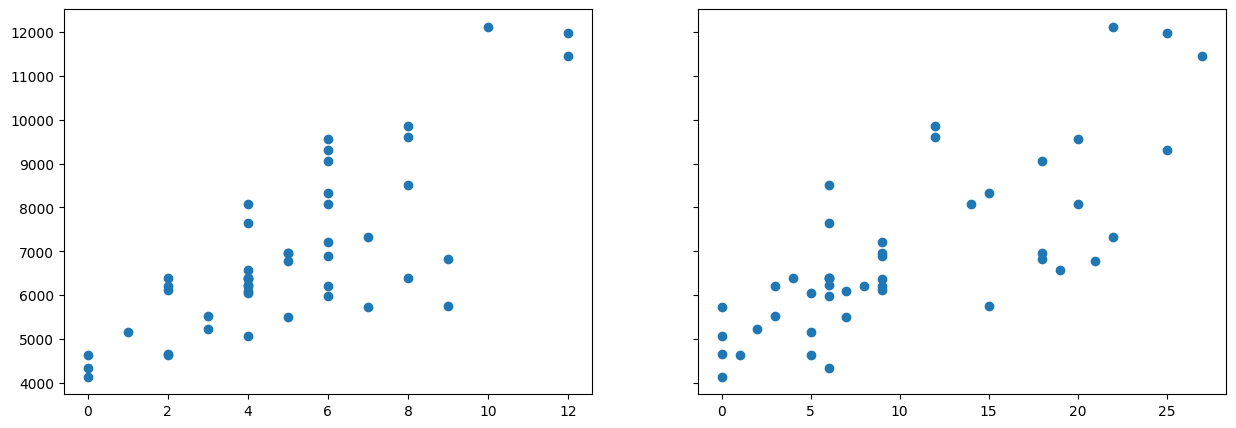

In [9]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
ax1.scatter(df['Anos_Educ_Superior'], df['Salario']);
ax2.scatter(df['Tempo_Empresa'], df['Salario']);

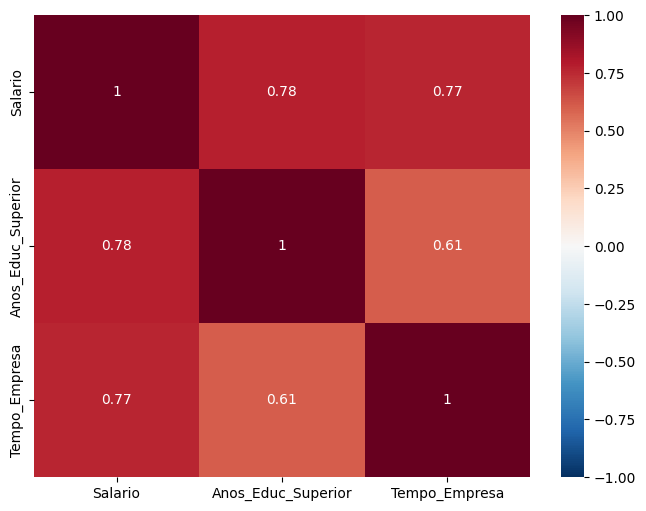

In [10]:
fig = plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(),
            cmap='RdBu_r',
            vmin=-1, vmax=1,
            annot=True);

In [12]:
y = df['Salario']

df['intercepto'] = 1
x = df[['intercepto', 'Anos_Educ_Superior',
        'Tempo_Empresa']]

In [13]:
modelo = sm.OLS(y, x)
resultado = modelo.fit()

print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     61.17
Date:                Mon, 27 May 2024   Prob (F-statistic):           2.66e-13
Time:                        16:47:10   Log-Likelihood:                -381.67
No. Observations:                  46   AIC:                             769.3
Df Residuals:                      43   BIC:                             774.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto          4056.0591    309

### Diagnóstico do Modelo: Análise dos Resíduos

In [18]:
def grafico_residuos(resultado):
    # Criando o gráfico de resíduos
    resid_graf = sns.scatterplot(x=list(range(0, len(resultado.resid_pearson))),
                                 y=resultado.resid_pearson.tolist())

    # Localizando valor mínimo dos resíduos
    r_aux = resultado.resid_pearson.tolist()
    r_aux.append(-3)
    ymin = min(r_aux) * 1.1

    # Localizando valor máximo dos resíduos
    r_aux = resultado.resid_pearson.tolist()
    r_aux.append(+3)
    ymax = max(r_aux) * 1.1

    resid_graf.set(ylim=(ymin, ymax))

    ax1 = resid_graf.axes
    ax1.axhline(0, color='black', ls='--')
    ax1.axhline(-2, color='black', ls='--')
    ax1.axhline(+2, color='black', ls='--')
    
    plt.show()

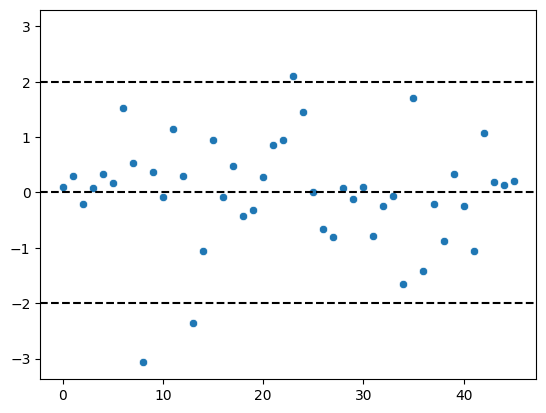

In [19]:
grafico_residuos(resultado)

#### Normalidade dos Resíduos

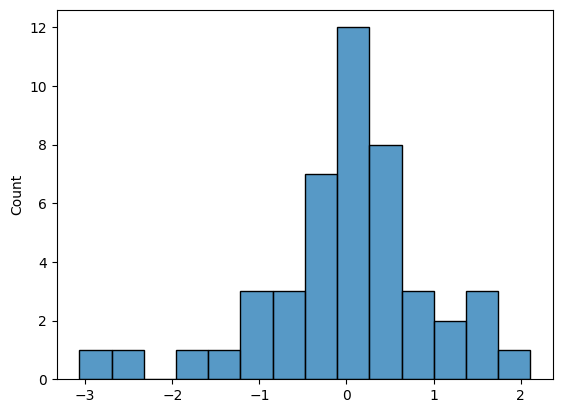

In [22]:
sns.histplot(resultado.resid_pearson);

In [25]:
# Realização de Teste de Hipóteses para avaliar Normalidade
from scipy.stats import shapiro
normalidade = shapiro(resultado.resid_pearson)
print(f'Estatística={normalidade.statistic:.3f}, p-valor={normalidade.pvalue:.3f}')

Estatística=0.952, p-valor=0.057


#### Homoscedasticidade dos Resíduos 

In [26]:
from statsmodels.stats.diagnostic import het_white
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']

In [27]:
white_test = het_white(resultado.resid_pearson, resultado.model.exog)

In [28]:
print(dict(zip(labels, white_test)))

{'LM Statistic': 14.66286205424024, 'LM-Test p-value': 0.011904321801029892, 'F-Statistic': 3.7432549404146913, 'F-Test p-value': 0.007127185674387098}
